In [46]:
import pandas as pd
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras 
from sklearn.metrics import classification_report
from keras.callbacks import EarlyStopping
from IPython.display import display, Markdown

In [11]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:

df = df.drop('customerID',axis=1)

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [15]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [17]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [18]:
def num_df(df):
  for col in df:
    if df[col].dtype == "object":
      df[col] = df[col].replace({
        'Female':0,
        'Male':1,
        'Yes':1,
         'No':0,
         'No internet service':0,
         'No phone service':0,
         
      })


num_df(df)

C:\Users\Amr Khaled\AppData\Local\Temp\ipykernel_27896\2714111682.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({


In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [20]:
df['TotalCharges'] = df['TotalCharges'].str.replace(',', '')
df['TotalCharges'] = df['TotalCharges'].str.strip()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print(df)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0                 0             DSL       

In [21]:
df = df.dropna()

In [22]:
df = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod']).astype(int)


In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   gender                                   7032 non-null   int64
 1   SeniorCitizen                            7032 non-null   int64
 2   Partner                                  7032 non-null   int64
 3   Dependents                               7032 non-null   int64
 4   tenure                                   7032 non-null   int64
 5   PhoneService                             7032 non-null   int64
 6   MultipleLines                            7032 non-null   int64
 7   OnlineSecurity                           7032 non-null   int64
 8   OnlineBackup                             7032 non-null   int64
 9   DeviceProtection                         7032 non-null   int64
 10  TechSupport                              7032 non-null   int64
 11  Streaming

In [25]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [26]:
df.MonthlyCharges.head()

0    0.11
1    0.38
2    0.35
3    0.24
4    0.52
Name: MonthlyCharges, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn',axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_train.shape

(5625, 26)

In [ ]:
def ANN(X_train,y_train,X_test,y_test,loss,weights):
  model= keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1000,activation='elu'),
    keras.layers.Dense(1,activation='sigmoid'),
  ])
  early_stop = EarlyStopping(
     monitor = 'val_loss',
     patience =100,
     restore_best_weights = True 
  )
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  model.fit(
    X_train,
    y_train,
    epochs=1000,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop],           
    class_weight=weights if weights != -1 else None
)
  
  print(model.evaluate(X_test,y_test))
  y_preds = model.predict(X_test)
  y_preds = np.round(y_preds)
  display(Markdown(f'```\n{classification_report(y_test, y_preds)}\n```'))

In [50]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/1000


c:\Users\Amr Khaled\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7704 - loss: 0.4886 - val_accuracy: 0.7861 - val_loss: 0.4569
Epoch 2/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8119 - loss: 0.4096 - val_accuracy: 0.7846 - val_loss: 0.4448
Epoch 3/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8017 - loss: 0.4202 - val_accuracy: 0.7797 - val_loss: 0.4577
Epoch 4/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8074 - loss: 0.4198 - val_accuracy: 0.7868 - val_loss: 0.4456
Epoch 5/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8067 - loss: 0.4225 - val_accuracy: 0.7790 - val_loss: 0.4586
Epoch 6/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8201 - loss: 0.3989 - val_accuracy: 0.7932 - val_loss: 0.4463
Epoch 7/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8211 - loss: 0.3939 - val_accuracy: 0.7846 - val_loss: 0.4463
Epoch 8/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8117 - loss: 0.4082 - val_accuracy:

```
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       999
           1       0.67      0.50      0.58       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.77      0.78      0.77      1407

```

In [ ]:
from sklearn.metrics import classification_report # type: ignore

print(classification_report(y_test,y_pred)) # type: ignore

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       999
           1       0.54      0.48      0.50       408

    accuracy                           0.73      1407
   macro avg       0.67      0.65      0.66      1407
weighted avg       0.72      0.73      0.72      1407



Text(95.72222222222221, 0.5, 'Truth')

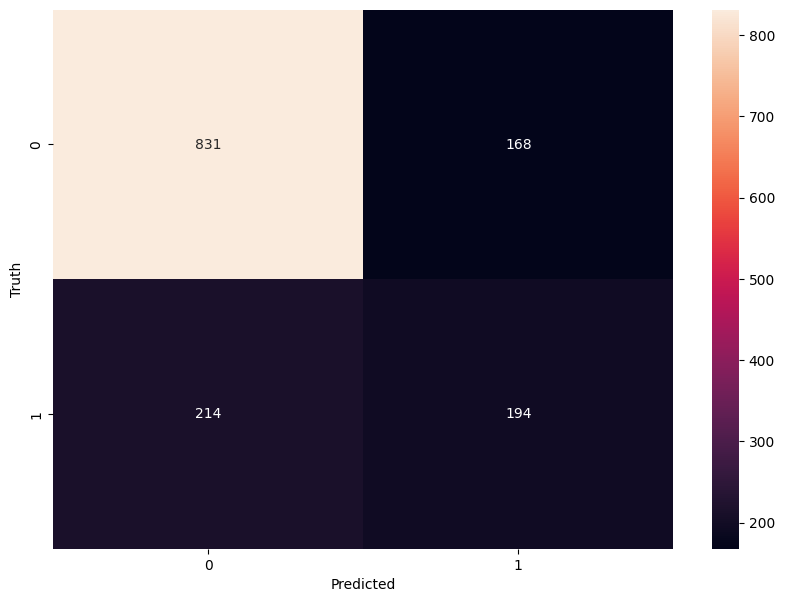

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred) # type: ignore

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

 ## method 1 ---> undersmpling
 

In [57]:
count_class_0,count_class_1 = df.Churn.value_counts()
df_class_0 = df[df['Churn'] ==0]
df_class_1 = df[df['Churn'] ==1]
count_class_0, count_class_1


(5163, 1869)

In [60]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0)

In [62]:
print(df_test_under['Churn'].value_counts(
  
))

Churn
0    1869
1    1869
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split # type: ignore
x= df_test_under.drop('Churn',axis=1)
y = df_test_under['Churn']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y)

In [66]:
y_train.value_counts()

Churn
1    1308
0    1308
Name: count, dtype: int64

In [67]:
y_preds = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/1000


c:\Users\Amr Khaled\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7042 - loss: 0.5790 - val_accuracy: 0.7665 - val_loss: 0.5051
Epoch 2/1000
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7626 - loss: 0.5023 - val_accuracy: 0.7602 - val_loss: 0.4988
Epoch 3/1000
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7679 - loss: 0.4865 - val_accuracy: 0.7647 - val_loss: 0.5037
Epoch 4/1000
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7547 - loss: 0.4801 - val_accuracy: 0.7674 - val_loss: 0.4915
Epoch 5/1000
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7606 - loss: 0.4768 - val_accuracy: 0.7620 - val_loss: 0.4905
Epoch 6/1000
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7617 - loss: 0.4779 - val_accuracy: 0.7665 - val_loss: 0.4901
Epoch 7/1000
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7637 - loss: 0.4748 - val_accuracy: 0.7558 - val_loss: 0.5170
Epoch 8/1000
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7734 - loss: 0.4651 - val_accuracy: 0.7567 - val_lo

```
              precision    recall  f1-score   support

           0       0.83      0.68      0.74       561
           1       0.73      0.86      0.79       561

    accuracy                           0.77      1122
   macro avg       0.78      0.77      0.76      1122
weighted avg       0.78      0.77      0.76      1122

```

## Methode2 : Oversampling

In [69]:
count_class_0,count_class_1

(5163, 1869)

In [72]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_test_over = pd.concat([df_class_1_over,df_class_0],axis=0)

In [77]:
df_test_over['Churn'].value_counts()

Churn
1    5163
0    5163
Name: count, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split
x= df_test_over.drop('Churn',axis=1)
y = df_test_over['Churn']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y)
y_preds = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/1000


c:\Users\Amr Khaled\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7265 - loss: 0.5415 - val_accuracy: 0.7673 - val_loss: 0.4879
Epoch 2/1000
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7558 - loss: 0.4994 - val_accuracy: 0.7631 - val_loss: 0.4840
Epoch 3/1000
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7683 - loss: 0.4867 - val_accuracy: 0.7660 - val_loss: 0.4792
Epoch 4/1000
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7792 - loss: 0.4720 - val_accuracy: 0.7657 - val_loss: 0.4788
Epoch 5/1000
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7798 - loss: 0.4663 - val_accuracy: 0.7634 - val_loss: 0.4839
Epoch 6/1000
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7810 - loss: 0.4599 - val_accuracy: 0.7695 - val_loss: 0.4787
Epoch 7/1000
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7759 - loss: 0.4712 - val_accuracy: 0.7744 - val_loss: 0.4756
Epoch 8/1000
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7897 - loss: 0.4595 - val_accuracy:

```
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1549
           1       0.77      0.82      0.79      1549

    accuracy                           0.79      3098
   macro avg       0.79      0.79      0.79      3098
weighted avg       0.79      0.79      0.79      3098

```

## method3 ---> SMOTE

In [96]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(
  sampling_strategy = 'minority')
X = df.drop('Churn',axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

X_sm,y_sm = smote.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)


In [97]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/1000


c:\Users\Amr Khaled\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7532 - loss: 0.5174 - val_accuracy: 0.7730 - val_loss: 0.4715
Epoch 2/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7754 - loss: 0.4668 - val_accuracy: 0.7764 - val_loss: 0.4610
Epoch 3/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7823 - loss: 0.4542 - val_accuracy: 0.7725 - val_loss: 0.4714
Epoch 4/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7866 - loss: 0.4498 - val_accuracy: 0.7759 - val_loss: 0.4630
Epoch 5/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7955 - loss: 0.4352 - val_accuracy: 0.7725 - val_loss: 0.4762
Epoch 6/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7939 - loss: 0.4424 - val_accuracy: 0.7817 - val_loss: 0.4501
Epoch 7/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7944 - loss: 0.4307 - val_accuracy: 0.7870 - val_loss: 0.4447
Epoch 8/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8024 - loss: 0.4266 - val_accuracy:

```
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1033
           1       0.80      0.85      0.83      1033

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066

```